# Assignment 06 - Text Analysis 

### Digital Humanities 140: Varsha Hunter 

## Shakespeare Word Frequency 

In [85]:
import requests
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
# Importing Macbeth 
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
html_string = response.text
document = BeautifulSoup(html_string, "html.parser").text
for i in ['\n','[',']','’','”','“', '\r', 'www.gutenberg.org', '»', '¿', 'ï', ',']:
    document = document.replace(i,' ')

In [103]:
# Tokenizing
sentences = sent_tokenize(document)
words = word_tokenize(document.lower())

In [105]:
# Removing Stopwords
myStopwords = list(punctuation) + stopwords.words('english')

wordsNoStop = []
for i in words:
    if i not in myStopwords:
        wordsNoStop.append(i)
        
print(wordsNoStop)

['project', 'gutenberg', 'ebook', 'macbeth', 'william', 'shakespeare', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 're-use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'macbeth', 'author', 'william', 'shakespeare', 'release', 'date', 'november', '1998', 'ebook', '1533', 'recently', 'updated', 'april', '25', '2021', 'language', 'english', 'character', 'set', 'encoding', 'utf-8', 'produced', 'pg', 'shakespeare', 'team', 'team', 'twenty', 'project', 'gutenberg', 'volunteers', 'start', 'project', 'gutenberg', 'ebook', 'macbeth', 'cover', 'macbeth', 'william', 'shakespeare', 'contents', 'act', 'scene', 'i.', 'open', 'place', 'scene', 'ii', 'camp', 'near', 'forres', 'scene', 'iii', 'heath', 'scene', 'iv', 'forres', 'room', 'palace', 'scene', 'v.', 'inverne

In [138]:
# Finding Top Frequency Words 
frequency = {}
for word in wordsNoStop:
    count = frequency.get(word,0)
    frequency[word] = count + 1
    
# Top 20 Most Frequent Words 
sorted_values = sorted(frequency.values())
sorted_freq = {}

for i in sorted_values:
    for k in frequency.keys():
        if frequency[k] == i:
            sorted_freq[k] = frequency[k]
            break

freq_items = sorted_freq.items()
first_twenty = list(freq_items)[-20:]
print(first_twenty)

[('would', 47), ('thâ\x80\x99', 49), ('first', 50), ('hath', 51), ('witch', 52), ('ross', 53), ('us', 54), ('yet', 56), ('scene', 57), ('malcolm', 58), ('thee', 60), ('upon', 61), ('banquo', 67), ('shall', 69), ('enter', 72), ('thou', 88), ('project', 89), ('lady', 97), ('macduff', 109), ('macbeth', 286)]


According to the 20 most frequent words in Shakespeare's Macbeth, these words do not give a well rounded representation of the play. Key words like 'macbeth' and 'macduff' are included, however other words like 'would' and 'yet' do not give good context for the play. 

## Yelp Sentiments

In [142]:
# Imports
import nltk
from nltk.sentiment import vader
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [145]:
# Yelp Reviews

review_1 = ['This is one my my familys favorite place to eat when we come to the city...Im not a huge ramen fan but my family is And since we dont have it often, so when they do ask this is the place we come to. the the only issue I have is Every time that we have come lunch or dinner they are ALWAYS sold out of the chicken paitan dx. Unfortunately Im always having to find something else to eat and its a bit of a bummer.']
review1_stars = 4
review_2 = ['Best Ramen in SF. The Tonkotsu ramen is immaculate with perfectly cooked pork belly and a naturally creamy broth!']
review2_stars = 5
review_3 = ['best ramen Ive ever had,  I love how they have chili powder you can add to adjust your like of heat']
review3_stars = 4
review_4 = ['Really great ramen. The wait isnt too bad - if the waitlist says 60 minutes, youll get seated in 30-45 min.The broth is really flavorful and if you get it spicy, it has the perfect kick. You can even get a noodle refill which might be the greatest option Ive ever seen.We got a couple pitchers of beer (very reasonable price) and were sufficiently comatosed at the end of the meal.']
review4_stars = 5
review_5= ['Ive been wanting to try this place as Ive heard its the best ramen in SF. I had the Hakata Tonkotsu Ramen w/Corn, which was great as the broth was very rich and flavorful and I also liked the thin noodles. We also tried the Menteiko Rice Bowl w/spicy seasoned cod roe, Takoyaki (Octopus Balls), Marukubu Bites (Japanese Steamed Buns filled with homemade pork chashu), and Marufuku Salad.We arrived at 11:10am on a weekday just after they opened and it was already a 30 minute wait. Thats when we realized Yelp had an online waitlist--so be sure to use it if you plan to go! However, the wait was also a good excuse to walk around Kinokuniya bookstore and all the other cute shops in the mall.']
review5_stars = 5
review_6 = ['Hands down the best ramen Ive ever had. Marufuku has a unique hakata broth that I havent tasted in other ramen joints before. Its simple but packs a punch from the spice. I got the deluxe hakata ramen which came with soft jammy yolk egg, pork belly, chasu slices, ginger, mushroom, corn and scallion.']
review6_stars = 5
review_7 = ['Jesus! I was in Japantown and like noodles , so I stopped in . They have a bowl chicken ramen broth with a grilled chicken leg for 20 bucks . I was like I guess I will get that but it will be like 25 bucks or more if I get a coke with it. When I sat down I saw the photo below for spicy Tantan men. THAT SHIT WAS THE BITNESS! I will be coming back here for more . The girl two tables down ordered the ramen with grilled chicken .... Damn that looked and smelled good . Her shit came out sizzlin like some fajitas and Japanese people dont make fajitas . The noodles here the best texture.']
review7_stars = 5
review_8 = ['These choices worked well together. The salad was Uber fresh arugula, red onion, red pepper and sprouts. Oh yeah, there were tomatoes but at this time of the year they were flavorless.The rice bowl was perfectly cooked rice with a nice sheen and a big thick piece of pork belly roasted to a mahogany hue. Additional, seaweed, ginger and green onions kept the dish interesting.It was a simple meal done well. Sometimes we need that.Also, the staff is exceptional!']
review8_stars = 5
review_9 = ['I came here on a Sunday afternoon with a friend at around 2/3 pm, and the wait was only 20 minutes. They checked our vaxx cards and IDs, and we ordered the chicken karaage and two hakata tonkotsu (mine was mild, his was medium). The food came out in 10-15 minutes, and it was *chefs kiss*. I loved the chicken karaage accompanied with the sauce and paprika (the picture doesnt give the portion justice, as the camera did not eat first). Regarding the ramen, give a pretty decent sized portion, and I finished 3/4 of mine. I tasted some of the medium spicy broth, and I actually preferred that one more (it gives more of a kick to the taste) so next time Ill be ordering that one!']
review9_stars = 5
review_10 = ['This is such an amazing place! It is super cute, comfortable and the ambiance is very nice. It usually has a long line, so better get a reservation.We had their tan tan men which was the special of the week and the famous hakata tonkotsu DX. The tan tan men were delicious. The broth was rich, the noodles al dente and the meat was very tasty. The tonkotsu broth was very rich, perhaps a tad too rich, but packed with flavor. It had lots of toppings. The noodles were cooked to perfection too. I highly recommend this place!']
review10_stars = 5 
review_11 = ['I am not a big ramen fan, but when I do get ramen, I usually order the chicken ramen. It also came with a soft boiled egg, so that was a plus because some places that I had been to had it an add-on for an additional cost. Overall, the ramen was decent, it tasted like any other ramen spot that I had been to, it was definitely not worth the wait, but glad to had the experience.']
review11_stars = 3
review_12 = ['The staff were really nice and friendly, and the food came out really quickly. I only ordered ramen but they also have great appetizers for those looking for more food.']
review12_stars = 5
review_13 = ['I visited Marufuku Ramen for the first time this past Sunday. My friend and I put our name down on the waitlist in person, which is the only waitlist option. And we explored the stores in Japan town for maybe 15-20 minutes before we received a notification that our table was ready. My friend and I both got the Hakatha Tonkatsu DX. The broth was very yummy and there was plenty of meat veggies and the boiled egg was the cherry on top. Dont leg the small looking bowl deceive you. There is plenty of food in the bowl. Overall loved our food and service. I just wish the "spicy" ramen was spicier. I still highly recommend it though.']
review13_stars = 4
review_14 = ['So yummy. Simple and delicious ramen. I get it spicy and it is so good!! The egg is always cooked to perfection and the pork belly is so soft and flavorful. Amazing noodles with perfect chew!! Cant wait to bring friends here when they visit the city.']
review14_stars = 5
review_15 = ['Amazing ramen! Wow you get so much for your buck! Not to mention is so tasty and definitely worth the hype. I got full not even halfway through. Great portion size. It does get really busy and theres always a long wait but its worth it! Really glad I got to try this place and will definitely be going back when I want to treat myself.']
review15_stars = 5

In [174]:
# Finding the Polarity of Each Review 
sia = vader.SentimentIntensityAnalyzer()
polarity_scores = []

# For Loop 
reviews = [review_1, review_2, review_3, review_4, review_5, review_6, review_7, review_8, review_9, review_10, review_11, review_12, review_13, review_14, review_15]

for review in reviews:
    polarity_scores.append(sia.polarity_scores(str(review)))
    
print(polarity_scores)

[{'neg': 0.126, 'neu': 0.852, 'pos': 0.022, 'compound': -0.8612}, {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.6696}, {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.7717}, {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.9418}, {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.9744}, {'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compound': 0.3818}, {'neg': 0.123, 'neu': 0.722, 'pos': 0.155, 'compound': 0.4919}, {'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.9468}, {'neg': 0.023, 'neu': 0.871, 'pos': 0.106, 'compound': 0.8985}, {'neg': 0.025, 'neu': 0.685, 'pos': 0.29, 'compound': 0.9798}, {'neg': 0.043, 'neu': 0.822, 'pos': 0.135, 'compound': 0.8526}, {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.8729}, {'neg': 0.055, 'neu': 0.769, 'pos': 0.176, 'compound': 0.9366}, {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.9805}, {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.9719}]


In [191]:
# Comparing Polarity Scores w Star Reviews
stars = [review1_stars, review2_stars, review3_stars, review4_stars, review5_stars, review6_stars, review7_stars, review8_stars, review9_stars, review10_stars, review11_stars, review12_stars, review13_stars, review14_stars, review15_stars]
compound_scores = []

for i in polarity_scores:
    compound_scores.append(i['compound'])


[-0.8612, 0.6696, 0.7717, 0.9418, 0.9744, 0.3818, 0.4919, 0.9468, 0.8985, 0.9798, 0.8526, 0.8729, 0.9366, 0.9805, 0.9719]


In [192]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Compound Polarity Scores vs. Star Reviews')

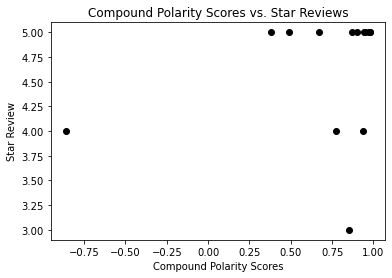

In [197]:
plt.plot(compound_scores, stars, 'o', color = 'black')
plt.xlabel('Compound Polarity Scores')
plt.ylabel('Star Review')
plt.title('Compound Polarity Scores vs. Star Reviews')

## Movie Reviews

In [199]:
# Movie Comedy Reviews 

comedy_1 = ['I really enjoyed this ensemble superhero movie, the diretors best since his similar GUARDIANS OF THE GALAXY. It has the same fun, anything goes kind of vibe, and the CGI effects are out of this world. This ones a DIRTY DOZEN style men-on-a-mission flick, as a group of refreshingly quirky heroes land on an island to take down a corrupt regime and their dark scientific experiment. The script zings, the violence and bloodshed are amped up, and the camaraderie works. Theres nothing not to like about this engagingly high energy production.']
comedy_2 = ['This is a fun family animated film. I really like the family aspect of this franchise. There seems to some fatigue from critics. This is not trying to be ground-breaking or surprising. This is simple and safe. It has a bit of humor and some gentle life lessons. It is basic good family animated fun.']
comedy_3 = ['Not sure if this played in any cinemas or not ... I just know that Adam Sandler did not return for voice duties. I imagine it had to do with either scheduling issues and/or budget issues (his fee to be more exact). But the substitute is doing more than a fine job. Also since as far as I can tell all the others did return, you will have the familiar Transylvania feeling']
comedy_4 = ['Id have to say this is one of the best animated films Ive ever seen. I liked it the first time but really appreciated it on the second viewing, just a few weeks ago. I can see why sequel is doing such great business at the box office. Apparently, a lot of people liked this movie.']
comedy_5 = ['A wonderful animated movie that deserves all the praise it garners. A simple story that comes across big and triumphant. Prehistoric animals rescue a human baby. Lending their voices to this beautiful project are: Ray Romano, Denis Leary, John Leguizamo, Diedrich Bader, Jack Black and Jan Krakowski. Dont miss the chance to see this family fare.']

# Movie Drama Reviews 

drama_1 = ['The main issue about this film for me, was the pacing, it was somewhat uneven, at times it felt frustratingly slow, fortunately it did pick up at its conclusion. The running time was overlong, what is it with films in 2021? Why the need for everything to be almost three hours? Is there some deal for cost per minute at cinemas? Ninety minute films work too.']
drama_2 = ['Initially then I wasnt really overly hooked on watching the 2021 movie "Dont Look Up" since I wasnt really won over by the movies synopsis. Granted, I hadnt checked out the movies trailer, so I wasnt really sure what I would be in for here. But as friends started to praise the movie, I opted to sit down and watch it.']
drama_3 = ['Dont Look Up tells a chilling story of lies, oppression, explosion, and deceit in modern day world, but in a light hearted way. The story itself is disturbing, but the delivery is not too depressing. The numerous stars add to the entertaining factor too. I enjoyed watching it.']
drama_4 = ['If you love a good satire, then look no further. If you have more than five brain cells, look for something a little bit more intelligent. An all star cast that act their parts beautifully. Good effects and cinematography. Its just too obvious.']
drama_5 = ['A typical boring artisanal film that tried and failed to be dark and seductive. The acting was decent but there was no substance to the characters or story. So many tangents and conversations that meant nothing. Not dark enough, not interesting enough.']

# Movie Reviews List
movie_reviews = [comedy_1, comedy_2, comedy_3, comedy_4, comedy_5, drama_1, drama_2, drama_3, drama_4, drama_5]

In [200]:
import pandas as pd
from pathlib import Path  
import glob

In [201]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [202]:
extrastop = ['``',"''","'re","'s","'re",'``',"''","'ll","--","\'\'","...",
             "n\'t",'one','would','use','subject','from',"\'m","\'ve"]

In [203]:
myStopWords2 = list(punctuation) + stopwords.words('english') + extrastop

In [213]:
listofwords = []
for i in movie_reviews:
    listofwords.append([w for w in word_tokenize(str(i).lower()) if w not in myStopWords2])

In [216]:
!pip install gensim

  Using cached gensim-4.1.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.0 MB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)


In [217]:
from gensim import corpora, models
import gensim

In [220]:
dictionary = corpora.Dictionary(listofwords)
corpus = [dictionary.doc2bow(text) for text in listofwords]

In [221]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=2, 
                                           id2word = dictionary, 
                                           passes=20)

In [222]:
for i in ldamodel.print_topics(num_topics=2, num_words=20):
    print(i)

(0, '0.012*"movie" + 0.008*"since" + 0.008*"good" + 0.008*"issues" + 0.008*"return" + 0.008*"effects" + 0.008*"best" + 0.008*"see" + 0.008*"animated" + 0.008*"liked" + 0.008*"look" + 0.008*"really" + 0.005*"nothing" + 0.005*"like" + 0.005*"enjoyed" + 0.005*"world" + 0.005*"simple" + 0.005*"praise" + 0.005*"dont" + 0.005*"sure"')
(1, '0.017*"really" + 0.013*"story" + 0.013*"family" + 0.013*"wasnt" + 0.013*"film" + 0.009*"films" + 0.009*"look" + 0.009*"fun" + 0.009*"animated" + 0.009*"dark" + 0.009*"movies" + 0.009*"2021" + 0.009*"watching" + 0.009*"minute" + 0.009*"enough" + 0.009*"movie" + 0.006*"time" + 0.006*"bit" + 0.006*"cinemas" + 0.006*"sure"')
